In [15]:
import pandas as pd
from scipy import stats
pd.set_option('display.max_columns', None)
df = pd.read_csv("dataset2/stats1.csv")
df = df[df['ownjunglekills'] >= 20].copy()
df = df.drop_duplicates(subset=['id'])
df = df[['id', 'win', 'kills', 'deaths', 'assists', 'totdmgtochamp', 'dmgtoobj', 'goldearned', 'turretkills', 'inhibkills', 'totminionskilled', 'wardsplaced', 'wardskilled']].copy()
df


,id,win,kills,deaths,assists,totdmgtochamp,dmgtoobj,goldearned,turretkills,inhibkills,totminionskilled,wardsplaced,wardskilled
0,9,0,6,10,1,9101,1826,10497,0,0,42,10,0
5,14,1,3,3,9,10587,16739,11885,1,0,28,8,2
12,21,0,1,7,4,5909,3070,9083,0,0,114,7,1
14,23,0,19,3,8,30236,160,15808,0,0,120,12,1
19,28,1,5,6,6,12571,9574,10990,0,1,43,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999974,1028357,1,0,6,6,6858,0,10582,0,0,36,12,3
999977,1028360,0,5,6,12,14230,0,10830,0,0,31,12,0
999984,1028367,0,4,5,11,10893,0,10115,1,0,35,10,1
999987,1028370,1,15,5,3,22364,0,13659,0,0,15,8,0


### T-test(s)

In [19]:
# Group 1: Kills from games won
kills_win = df[df['win'] == 1]['kills']

# Group 2: Kills from games lost
kills_loss = df[df['win'] == 0]['kills']

# Shapiro-Wilk Test for normality
from scipy.stats import shapiro

# For kills in wins
stat_win, p_win = shapiro(kills_win)
# For kills in losses
stat_loss, p_loss = shapiro(kills_loss)

print(f'Wins normality p-value: {p_win}')
print(f'Losses normality p-value: {p_loss}')

from scipy.stats import levene

stat_levene, p_levene = levene(kills_win, kills_loss)
print(f'Levene’s Test p-value: {p_levene}')

# Variances are not equal ( p <= 0.05) so using Welch's t test
t_stat, p_value = stats.ttest_ind(kills_win, kills_loss, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in kills between winning and losing players.")
else:
    print("Fail to reject the null hypothesis: No significant difference in kills between winning and losing players.")

Wins normality p-value: 7.436617366390814e-94
Losses normality p-value: 8.926838769379472e-106
Levene’s Test p-value: 0.0
T-statistic: 121.7628359411134, P-value: 0.0
Reject the null hypothesis: Significant difference in kills between winning and losing players.


C:\Users\peter\AppData\Local\Temp\ipykernel_7516\3449641440.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 105489.
  stat_win, p_win = shapiro(kills_win)
C:\Users\peter\AppData\Local\Temp\ipykernel_7516\3449641440.py:13: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 102531.
  stat_loss, p_loss = shapiro(kills_loss)


### XGBoost and SHAP

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.87859	validation_1-auc:0.87755
[4]	validation_0-auc:0.88869	validation_1-auc:0.88727
[5]	validation_0-auc:0.89242	validation_1-auc:0.89070
[6]	validation_0-auc:0.89776	validation_1-auc:0.89611
[7]	validation_0-auc:0.89927	validation_1-auc:0.89783
[8]	validation_0-auc:0.90368	validation_1-auc:0.90224
[9]	validation_0-auc:0.90440	validation_1-auc:0.90285
[10]	validation_0-auc:0.90660	validation_1-auc:0.90505
[11]	validation_0-auc:0.90739	validation_1-auc:0.90584
[12]	validation_0-auc:0.90769	validation_1-auc:0.90607
[13]	validation_0-auc:0.90947	validation_1-auc:0.90801
[14]	validation_0-auc:0.90950	validation_1-auc:0.90801
[15]	validation_0-auc:0.91050	validation_1-auc:0.90917
[16]	validation_0-auc:0.91143	validation_1-auc:0.91011
[17]	validation_0-auc:0.91174	validation_1-auc:0.91036
[18]	validation_0-auc:0.91229	validation_1-auc:0.91101
[19]	validation_0-auc:0.91279	validation_1-auc:0.91152
[20]	validation_0-auc:0.91318	validation_1-auc:0.91200
[21]	validation_0

 99%|===================| 41384/41604 [01:29<00:00]        

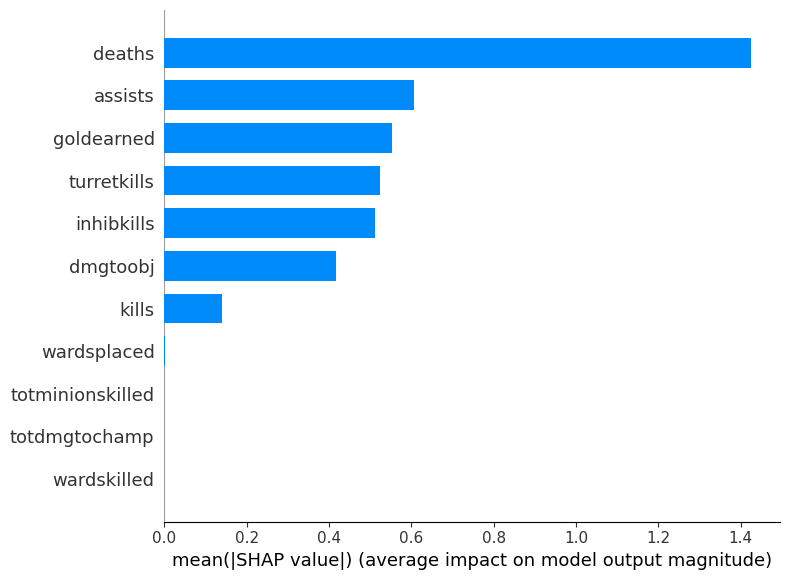

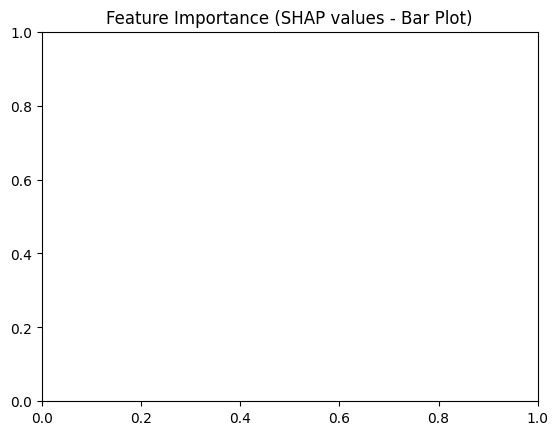

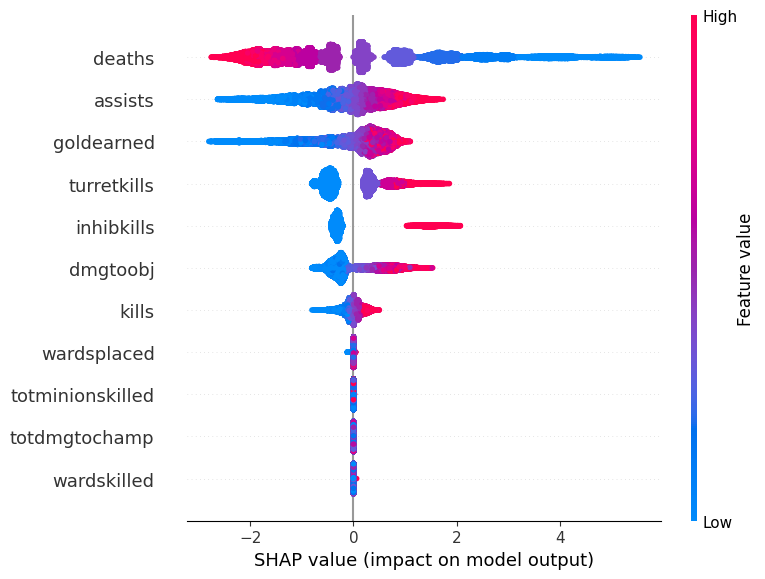

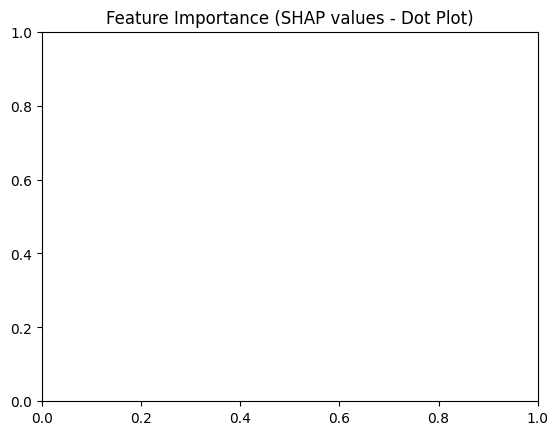

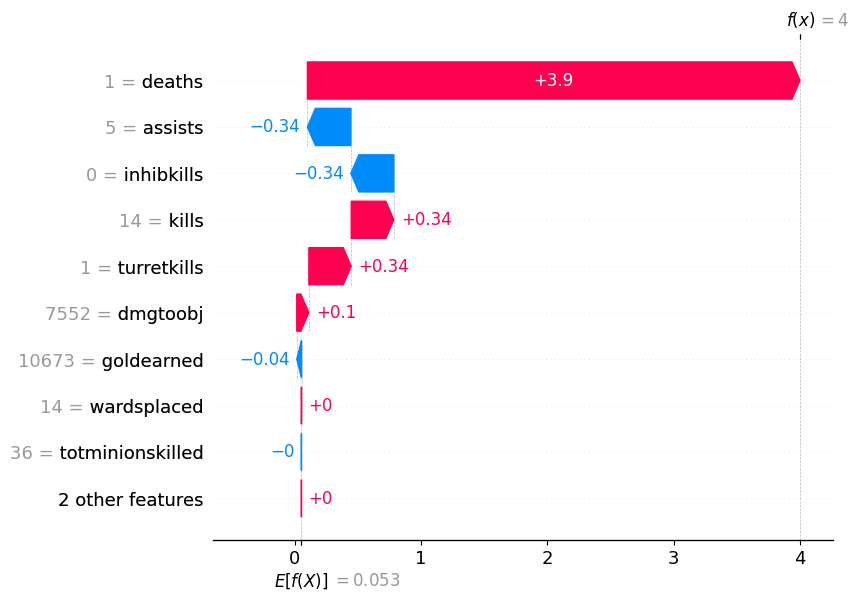

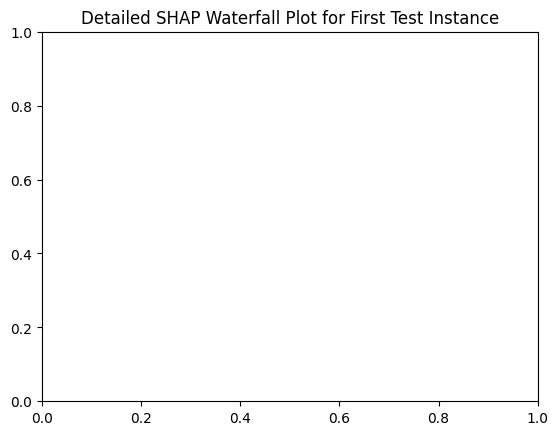

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'kills',
    'deaths',
    'assists',
    'totdmgtochamp',
    'dmgtoobj',
    'goldearned',
    'turretkills',
    'inhibkills',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'kills': 1,
    'deaths': -1,
    'assists': 1,
    'totdmgtochamp': 1,
    'dmgtoobj': 1,
    'goldearned': 1,
    'turretkills': 1,
    'inhibkills': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.82851	validation_1-auc:0.83186
[6]	validation_0-auc:0.83069	validation_1-auc:0.83391
[7]	validation_0-auc:0.83327	validation_1-auc:0.83644
[8]	validation_0-auc:0.83567	validation_1-auc:0.83878
[9]	validation_0-auc:0.83508	validation_1-auc:0.83833
[10]	validation_0-auc:0.83673	validation_1-auc:0.83995
[11]	validation_0-auc:0.83786	validation_1-auc:0.84108
[12]	validation_0-auc:0.83811	validation_1-auc:0.84129
[13]	validation_0-auc:0.83828	validation_1-auc:0.84142
[14]	validation_0-auc:0.83877	validation_1-auc:0.84189
[15]	validation_0-auc:0.83910	validation_1-auc:0.84212
[16]	validation_0-auc:0.83928	validation_1-auc:0.84231
[17]	validation_0-auc:0.83976	validation_1-auc:0.84285
[18]	validation_0-auc:0.83998	validation_1-auc:0.84308
[19]	validation_0-auc:0.84013	validation_1-auc:0.84323
[20]	validation_0-auc:0.84031	validation_1-auc:0.84337
[21]	validation_0-auc:0.84055	validation_1-auc:0.84360
[22]	validation_0-auc:0.84062	validation_1-auc:0.84364
[23]	validation

 98%|===================| 40855/41604 [00:49<00:00]        

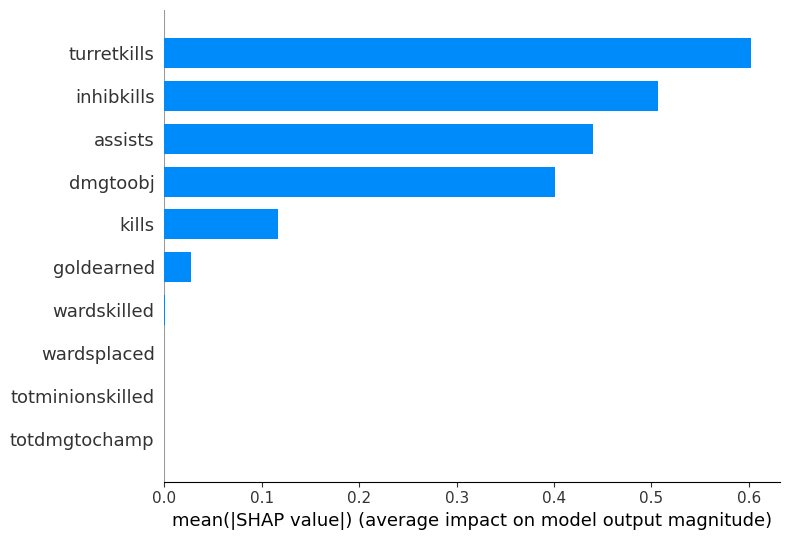

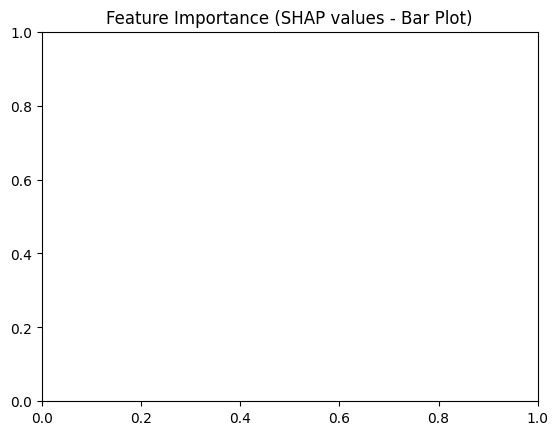

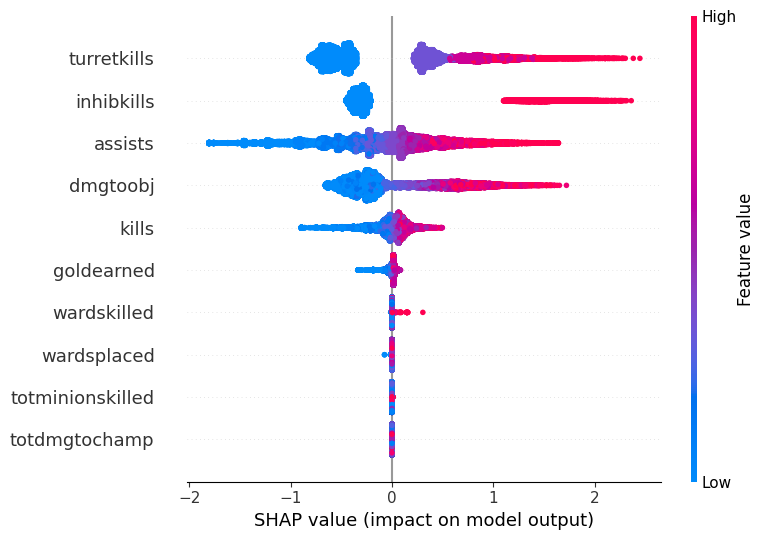

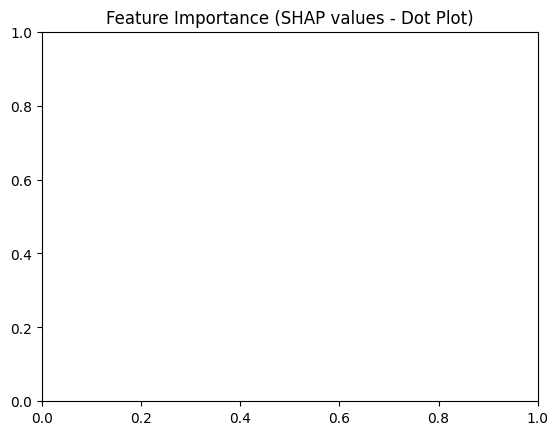

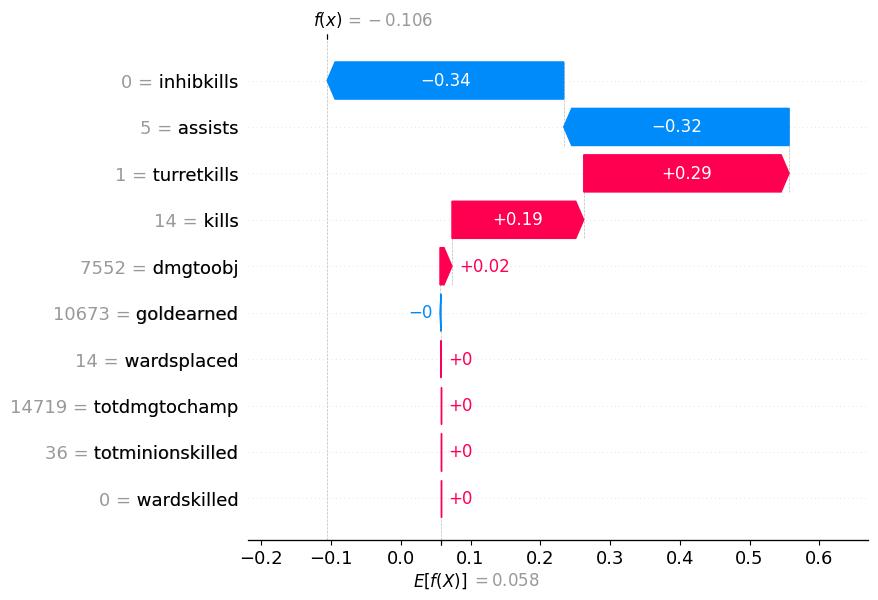

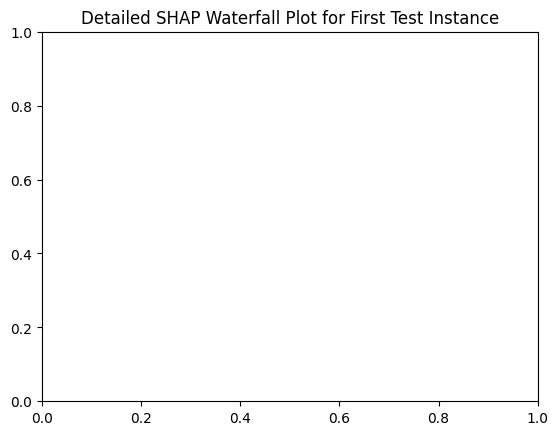

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'kills',
    'assists',
    'totdmgtochamp',
    'dmgtoobj',
    'goldearned',
    'turretkills',
    'inhibkills',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'kills': 1,
    'assists': 1,
    'totdmgtochamp': 1,
    'dmgtoobj': 1,
    'goldearned': 1,
    'turretkills': 1,
    'inhibkills': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.76908	validation_1-auc:0.77016
[5]	validation_0-auc:0.76944	validation_1-auc:0.77064
[6]	validation_0-auc:0.77096	validation_1-auc:0.77221
[7]	validation_0-auc:0.77126	validation_1-auc:0.77253
[8]	validation_0-auc:0.77152	validation_1-auc:0.77283
[9]	validation_0-auc:0.77197	validation_1-auc:0.77335
[10]	validation_0-auc:0.77242	validation_1-auc:0.77372
[11]	validation_0-auc:0.77258	validation_1-auc:0.77386
[12]	validation_0-auc:0.77339	validation_1-auc:0.77472
[13]	validation_0-auc:0.77353	validation_1-auc:0.77484
[14]	validation_0-auc:0.77401	validation_1-auc:0.77524
[15]	validation_0-auc:0.77452	validation_1-auc:0.77573
[16]	validation_0-auc:0.77461	validation_1-auc:0.77575
[17]	validation_0-auc:0.77471	validation_1-auc:0.77584
[18]	validation_0-auc:0.77505	validation_1-auc:0.77621
[19]	validation_0-auc:0.77532	validation_1-auc:0.77646
[20]	validation_0-auc:0.77540	validation_1-auc:0.77653
[21]	validation_0-auc:0.77557	validation_1-auc:0.77670
[22]	validation_

 99%|===================| 41365/41604 [00:58<00:00]        

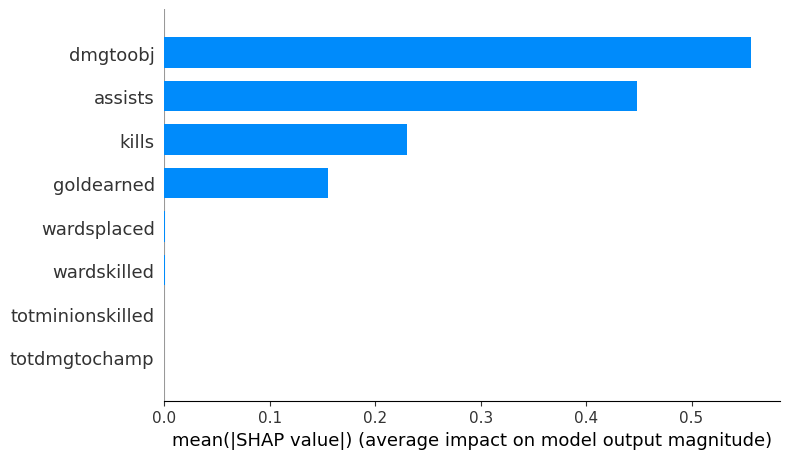

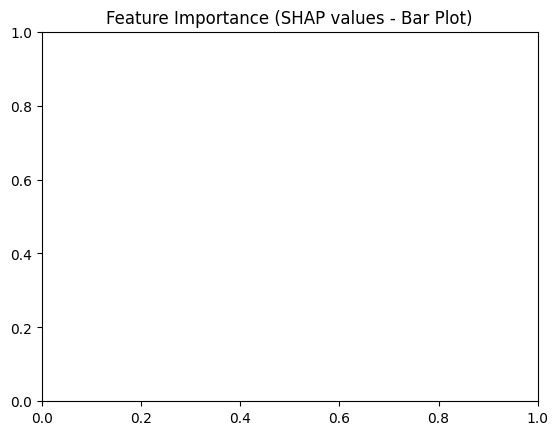

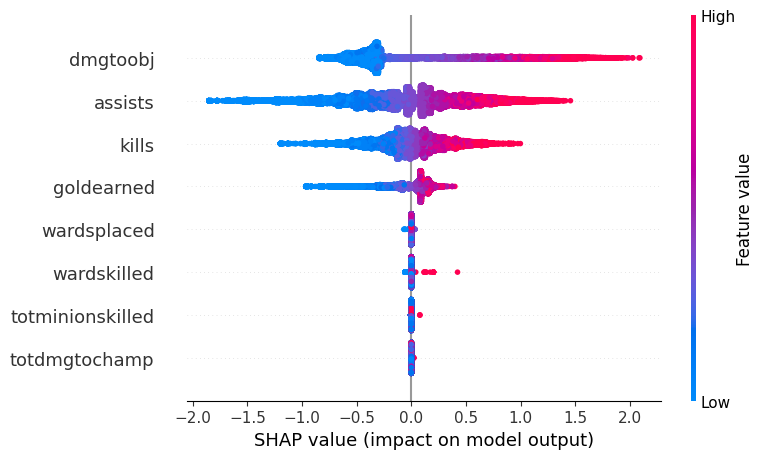

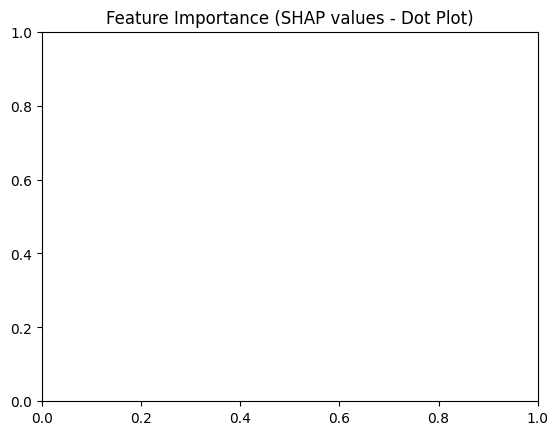

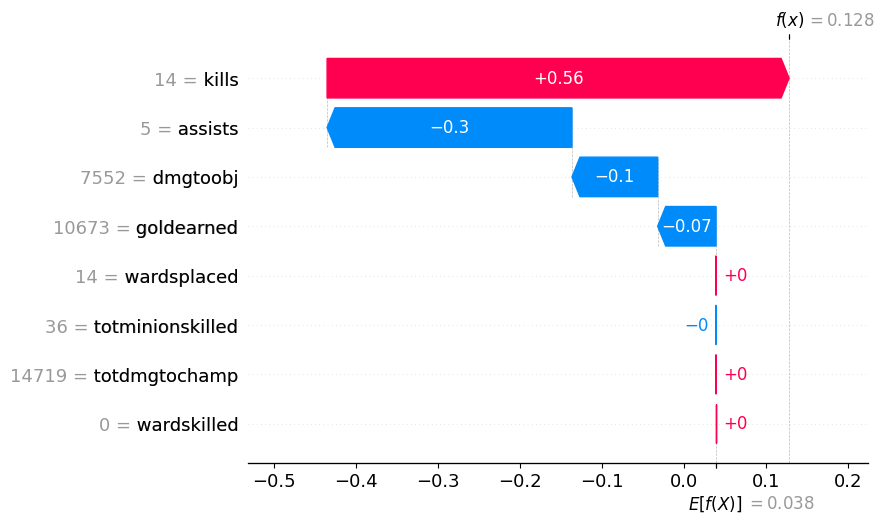

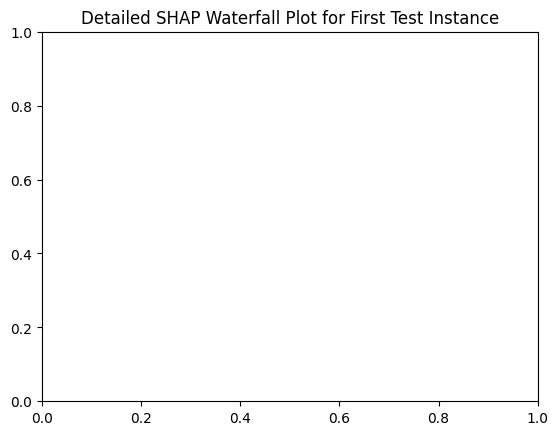

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'kills',
    'assists',
    'totdmgtochamp',
    'dmgtoobj',
    'goldearned',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'kills': 1,
    'assists': 1,
    'totdmgtochamp': 1,
    'dmgtoobj': 1,
    'goldearned': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.71774	validation_1-auc:0.71934
[5]	validation_0-auc:0.71873	validation_1-auc:0.72016
[6]	validation_0-auc:0.71878	validation_1-auc:0.72026
[7]	validation_0-auc:0.71939	validation_1-auc:0.72085
[8]	validation_0-auc:0.72021	validation_1-auc:0.72147
[9]	validation_0-auc:0.72051	validation_1-auc:0.72168
[10]	validation_0-auc:0.72086	validation_1-auc:0.72208
[11]	validation_0-auc:0.72123	validation_1-auc:0.72232
[12]	validation_0-auc:0.72136	validation_1-auc:0.72241
[13]	validation_0-auc:0.72155	validation_1-auc:0.72250
[14]	validation_0-auc:0.72174	validation_1-auc:0.72264
[15]	validation_0-auc:0.72196	validation_1-auc:0.72279
[16]	validation_0-auc:0.72209	validation_1-auc:0.72282
[17]	validation_0-auc:0.72218	validation_1-auc:0.72293
[18]	validation_0-auc:0.72238	validation_1-auc:0.72313
[19]	validation_0-auc:0.72250	validation_1-auc:0.72321
[20]	validation_0-auc:0.72263	validation_1-auc:0.72331
[21]	validation_0-auc:0.72274	validation_1-auc:0.72341
[22]	validation_

 99%|===================| 41148/41604 [00:54<00:00]        

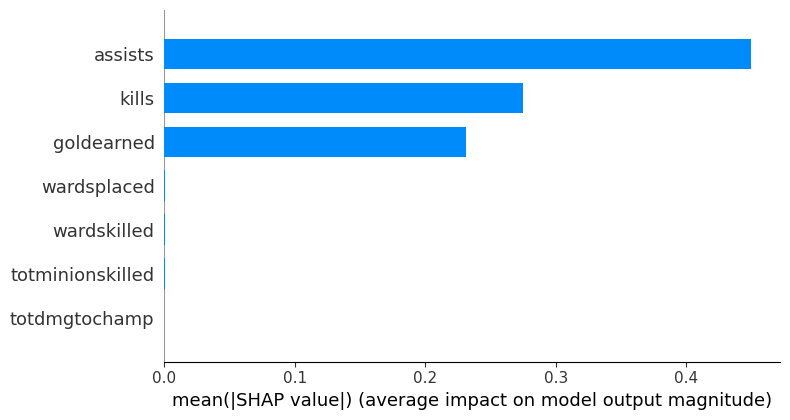

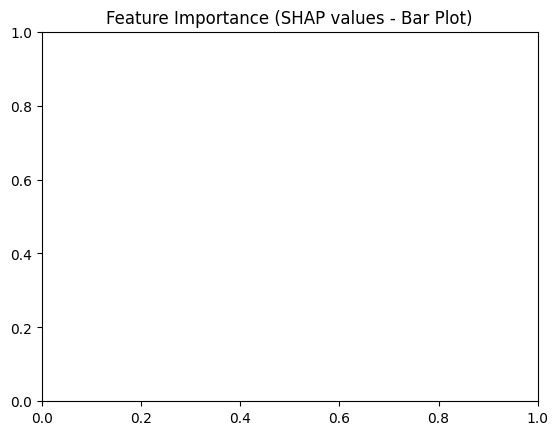

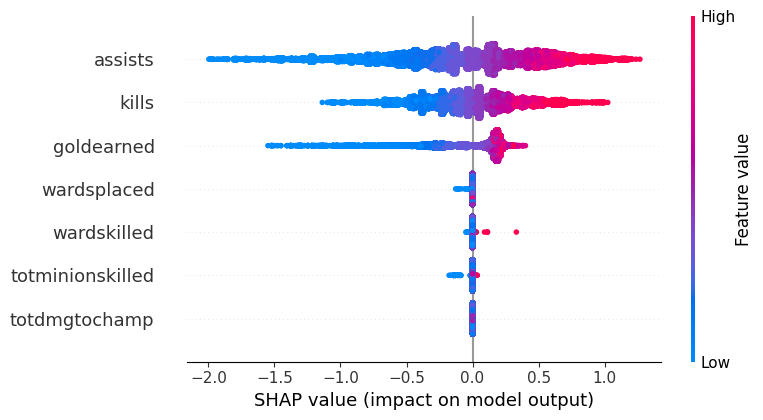

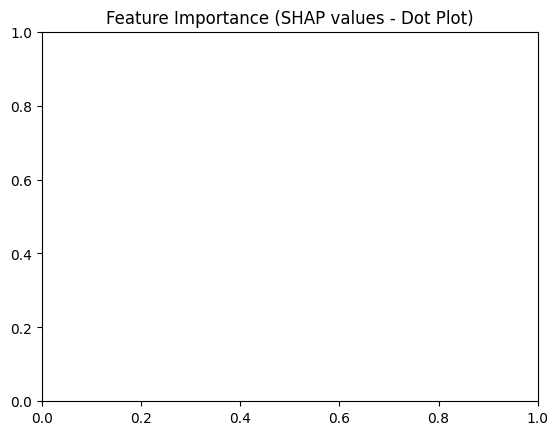

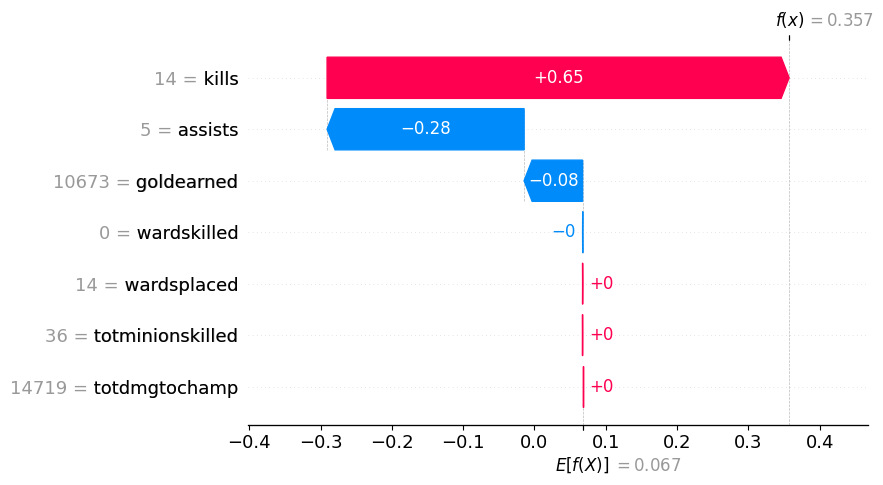

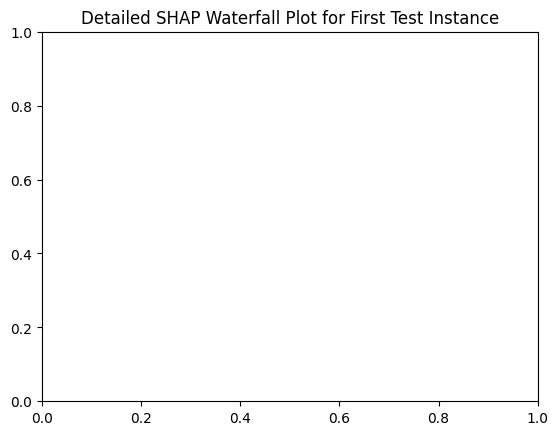

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'kills',
    'assists',
    'totdmgtochamp',
    'goldearned',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'kills': 1,
    'assists': 1,
    'totdmgtochamp': 1,
    'goldearned': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.68849	validation_1-auc:0.68928
[5]	validation_0-auc:0.68855	validation_1-auc:0.68927
[6]	validation_0-auc:0.68859	validation_1-auc:0.68947
[7]	validation_0-auc:0.68863	validation_1-auc:0.68951
[8]	validation_0-auc:0.68865	validation_1-auc:0.68949
[9]	validation_0-auc:0.68867	validation_1-auc:0.68951
[10]	validation_0-auc:0.68870	validation_1-auc:0.68949
[11]	validation_0-auc:0.68876	validation_1-auc:0.68959
[12]	validation_0-auc:0.68882	validation_1-auc:0.68957
[13]	validation_0-auc:0.68882	validation_1-auc:0.68960
[14]	validation_0-auc:0.68887	validation_1-auc:0.68962
[15]	validation_0-auc:0.68888	validation_1-auc:0.68969
[16]	validation_0-auc:0.68896	validation_1-auc:0.68975
[17]	validation_0-auc:0.68899	validation_1-auc:0.68977
[18]	validation_0-auc:0.68903	validation_1-auc:0.68979
[19]	validation_0-auc:0.68905	validation_1-auc:0.68983
[20]	validation_0-auc:0.68906	validation_1-auc:0.68983
[21]	validation_0-auc:0.68908	validation_1-auc:0.68982
[22]	validation_

100%|===================| 41479/41604 [00:44<00:00]        

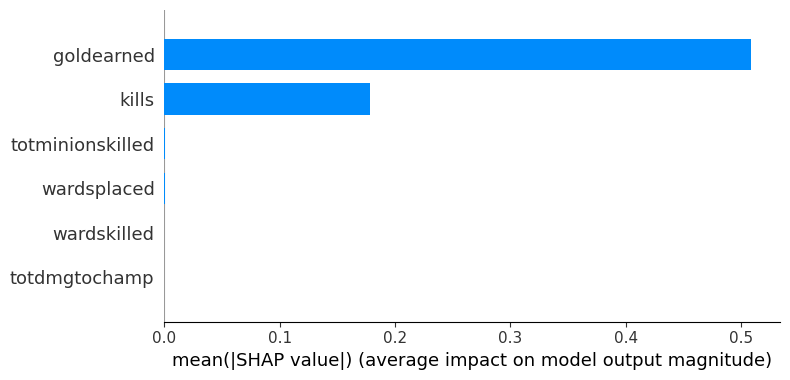

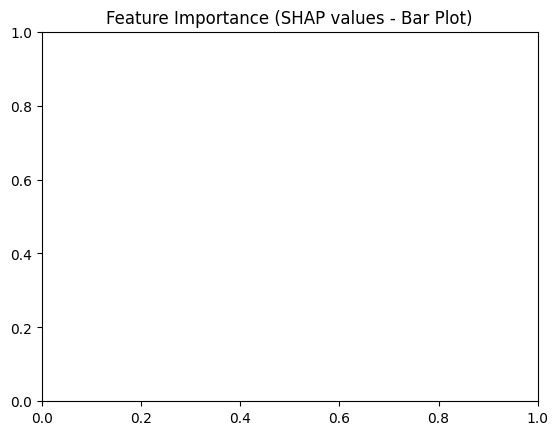

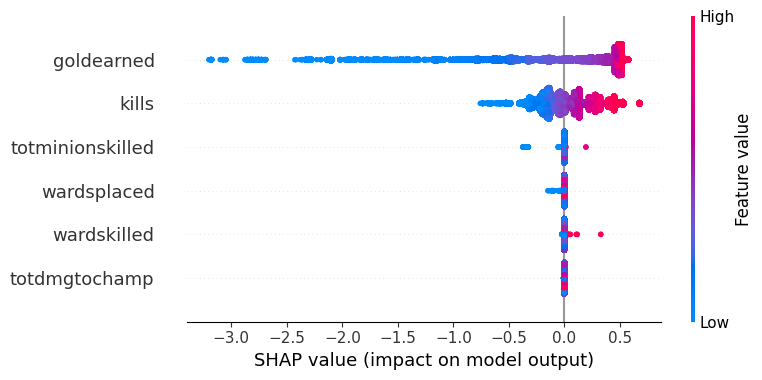

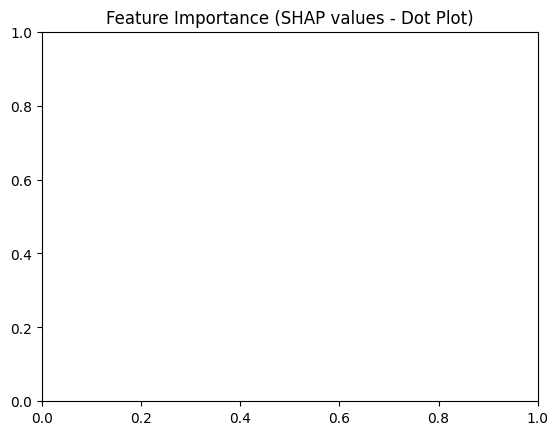

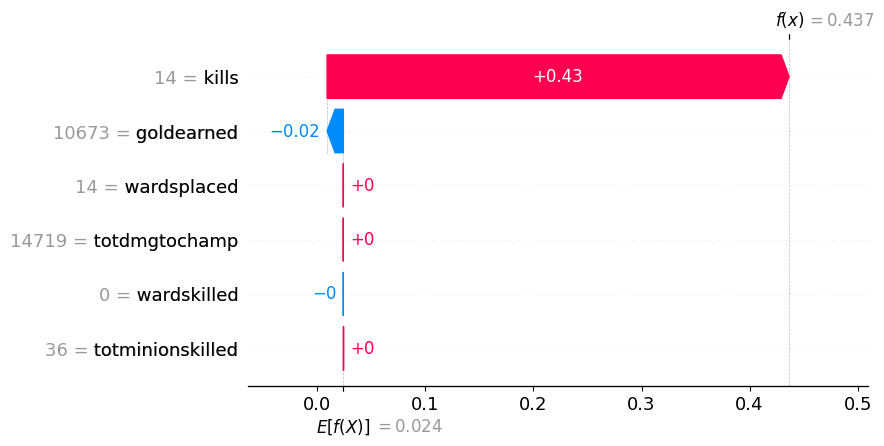

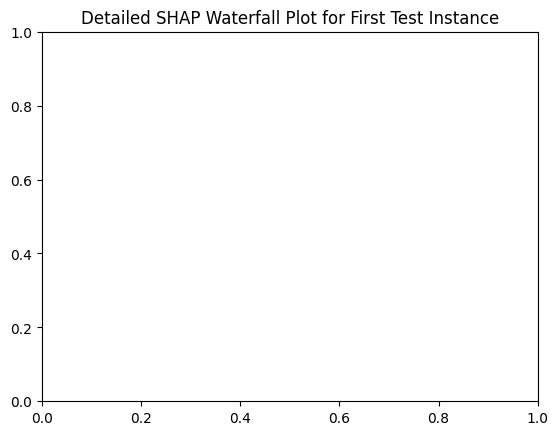

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'kills',
    'totdmgtochamp',
    'goldearned',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'kills': 1,
    'totdmgtochamp': 1,
    'goldearned': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.65669	validation_1-auc:0.65463
[6]	validation_0-auc:0.65670	validation_1-auc:0.65461
[7]	validation_0-auc:0.65672	validation_1-auc:0.65464
[8]	validation_0-auc:0.65672	validation_1-auc:0.65464
[9]	validation_0-auc:0.65673	validation_1-auc:0.65465
[10]	validation_0-auc:0.65674	validation_1-auc:0.65466
[11]	validation_0-auc:0.65674	validation_1-auc:0.65465
[12]	validation_0-auc:0.65675	validation_1-auc:0.65465
[13]	validation_0-auc:0.65675	validation_1-auc:0.65470
[14]	validation_0-auc:0.65675	validation_1-auc:0.65470
[15]	validation_0-auc:0.65676	validation_1-auc:0.65470
[16]	validation_0-auc:0.65676	validation_1-auc:0.65469
[17]	validation_0-auc:0.65677	validation_1-auc:0.65468
[18]	validation_0-auc:0.65677	validation_1-auc:0.65469
[19]	validation_0-auc:0.65677	validation_1-auc:0.65468
[20]	validation_0-auc:0.65678	validation_1-auc:0.65468
[21]	validation_0-auc:0.65678	validation_1-auc:0.65469
[22]	validation_0-auc:0.65678	validation_1-auc:0.65468
[23]	validation

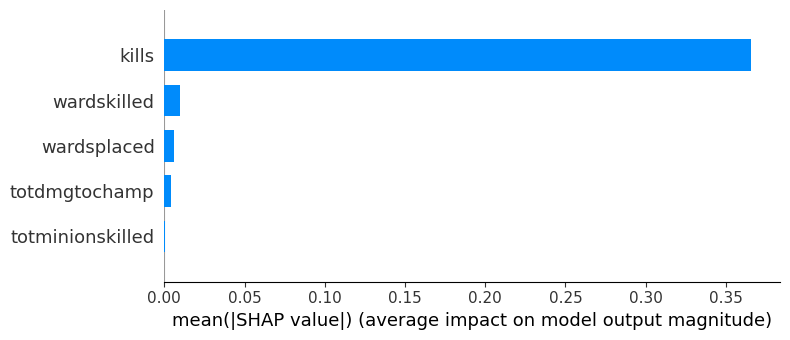

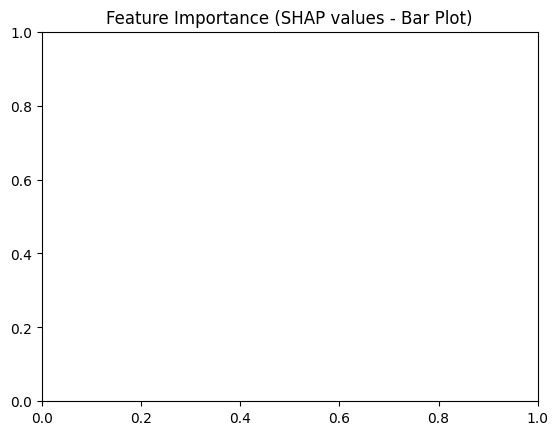

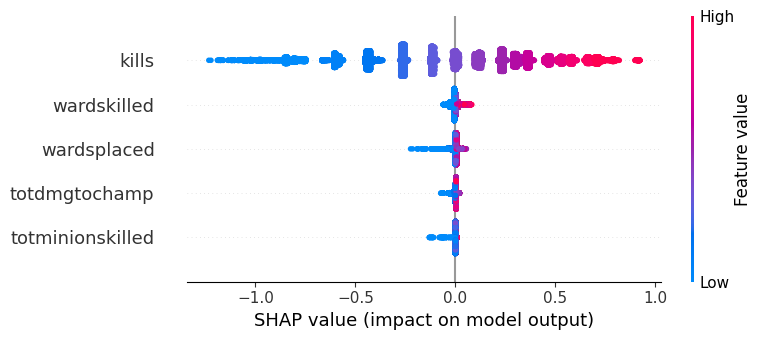

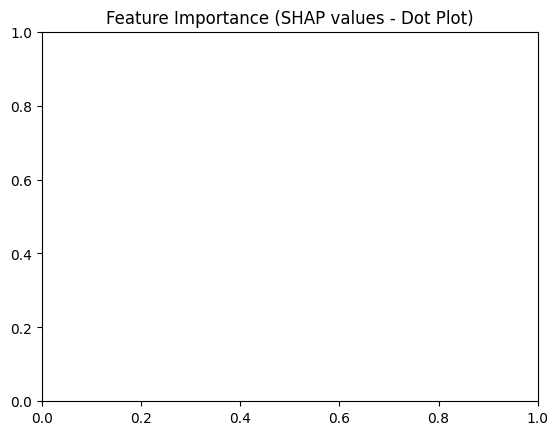

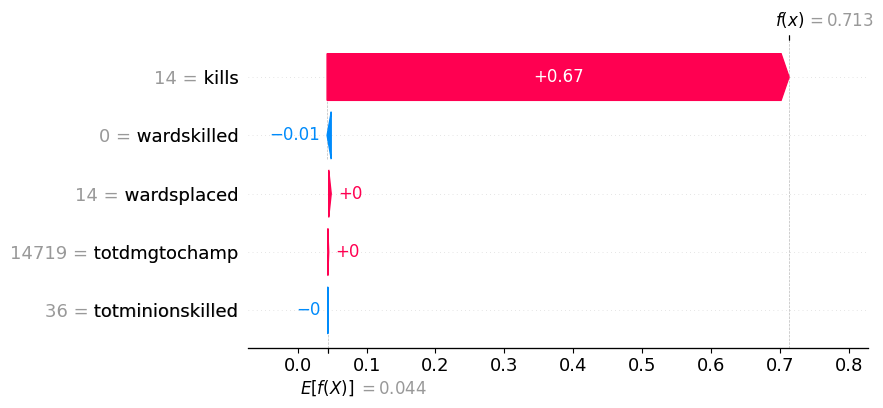

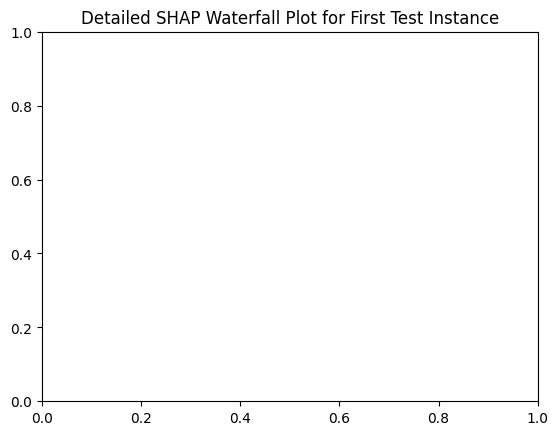

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'kills',
    'totdmgtochamp',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'kills': 1,
    'totdmgtochamp': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.57938	validation_1-auc:0.57789
[5]	validation_0-auc:0.57939	validation_1-auc:0.57786
[6]	validation_0-auc:0.57940	validation_1-auc:0.57788
[7]	validation_0-auc:0.57939	validation_1-auc:0.57787
[8]	validation_0-auc:0.57940	validation_1-auc:0.57793
[9]	validation_0-auc:0.57940	validation_1-auc:0.57793
[10]	validation_0-auc:0.57941	validation_1-auc:0.57792
[11]	validation_0-auc:0.57942	validation_1-auc:0.57790
[12]	validation_0-auc:0.57942	validation_1-auc:0.57792
[13]	validation_0-auc:0.57943	validation_1-auc:0.57793
[14]	validation_0-auc:0.57944	validation_1-auc:0.57794
[15]	validation_0-auc:0.57945	validation_1-auc:0.57794
[16]	validation_0-auc:0.57945	validation_1-auc:0.57795
[17]	validation_0-auc:0.57945	validation_1-auc:0.57795
[18]	validation_0-auc:0.57945	validation_1-auc:0.57792
[19]	validation_0-auc:0.57945	validation_1-auc:0.57790
[20]	validation_0-auc:0.57947	validation_1-auc:0.57791
[21]	validation_0-auc:0.57947	validation_1-auc:0.57788
[22]	validation_

 99%|===================| 41202/41604 [00:20<00:00]        

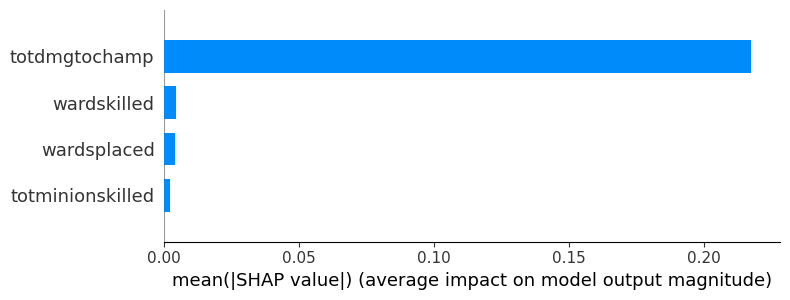

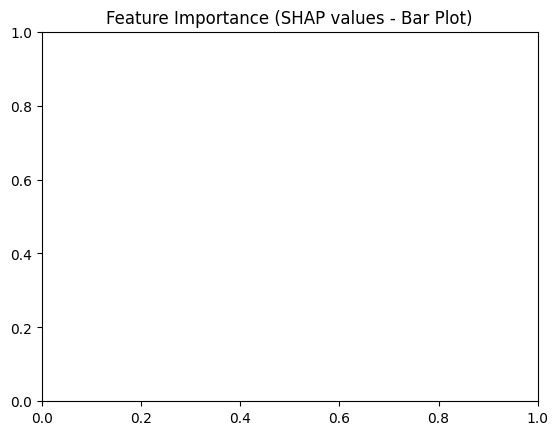

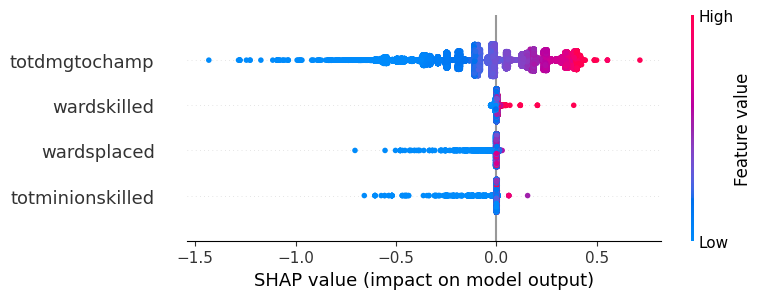

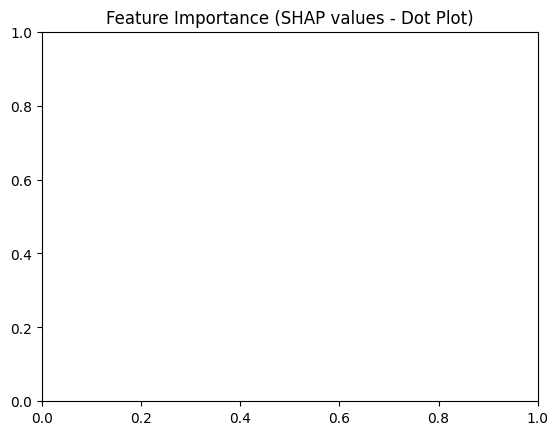

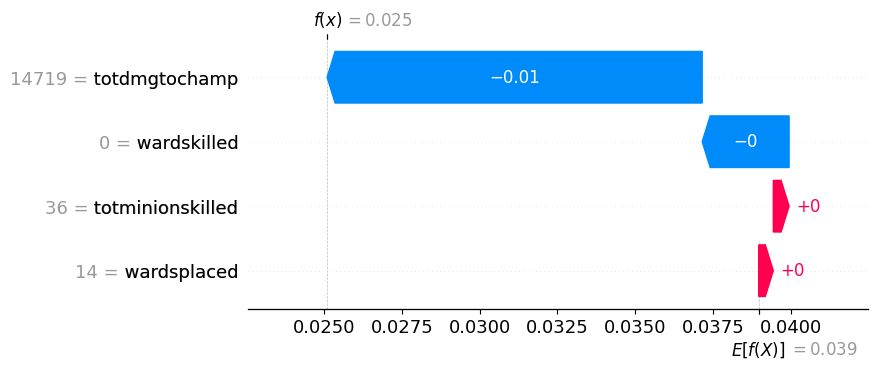

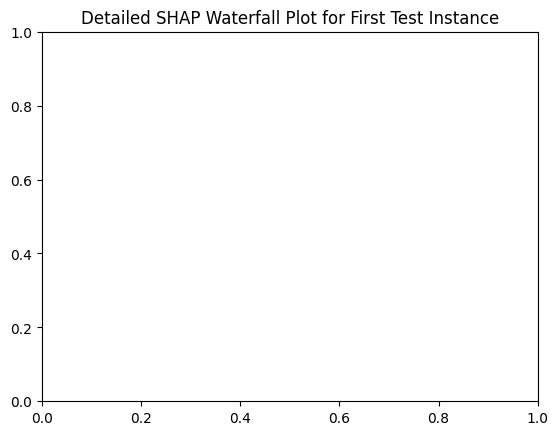

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'totdmgtochamp',
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'totdmgtochamp': 1,
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.52696	validation_1-auc:0.52724
[6]	validation_0-auc:0.52689	validation_1-auc:0.52743
[7]	validation_0-auc:0.52705	validation_1-auc:0.52734
[8]	validation_0-auc:0.52704	validation_1-auc:0.52748
[9]	validation_0-auc:0.52712	validation_1-auc:0.52736
[10]	validation_0-auc:0.52712	validation_1-auc:0.52734
[11]	validation_0-auc:0.52725	validation_1-auc:0.52729
[12]	validation_0-auc:0.52730	validation_1-auc:0.52738
[13]	validation_0-auc:0.52727	validation_1-auc:0.52749
[14]	validation_0-auc:0.52721	validation_1-auc:0.52732
[15]	validation_0-auc:0.52730	validation_1-auc:0.52734
[16]	validation_0-auc:0.52731	validation_1-auc:0.52728
[17]	validation_0-auc:0.52730	validation_1-auc:0.52728
[18]	validation_0-auc:0.52730	validation_1-auc:0.52724
[19]	validation_0-auc:0.52733	validation_1-auc:0.52729
[20]	validation_0-auc:0.52726	validation_1-auc:0.52726
[21]	validation_0-auc:0.52726	validation_1-auc:0.52721
[22]	validation_0-auc:0.52726	validation_1-auc:0.52718
[23]	validation

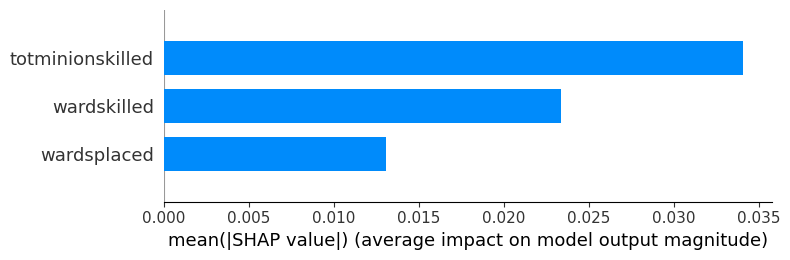

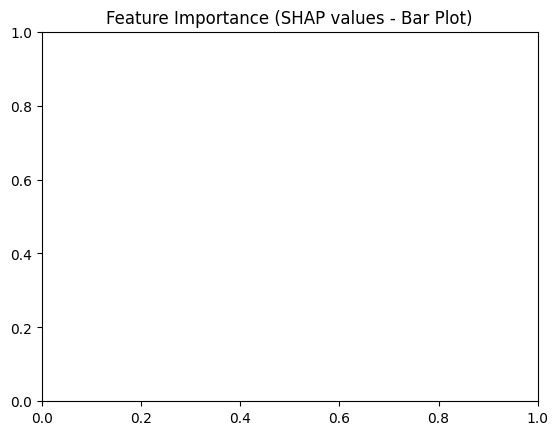

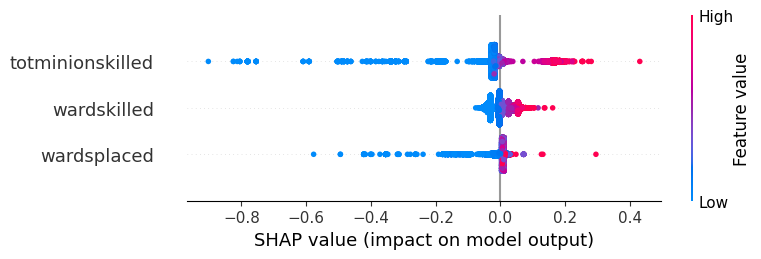

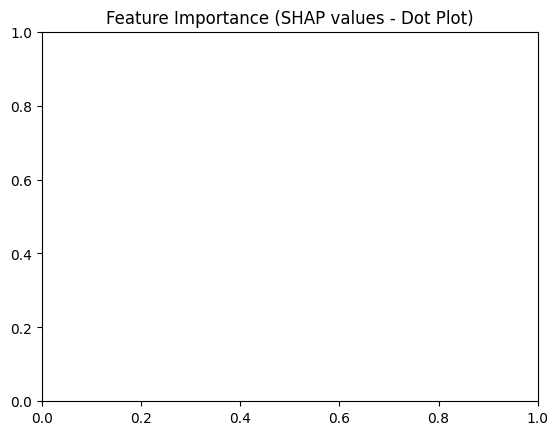

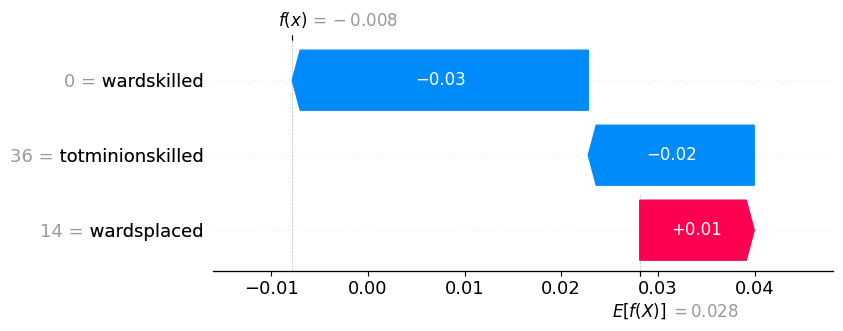

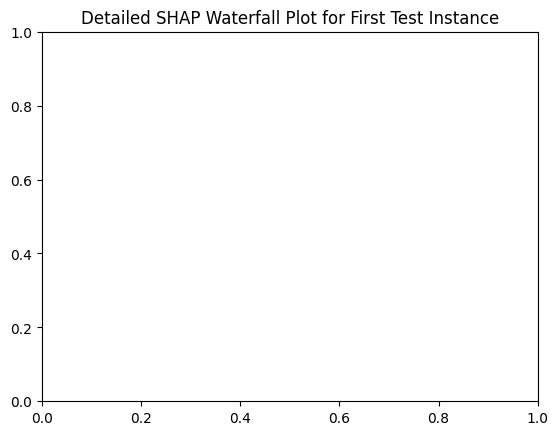

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'totminionskilled': 1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.51916	validation_1-auc:0.52123
[5]	validation_0-auc:0.51923	validation_1-auc:0.52111
[6]	validation_0-auc:0.51928	validation_1-auc:0.52110
[7]	validation_0-auc:0.51932	validation_1-auc:0.52125
[8]	validation_0-auc:0.51933	validation_1-auc:0.52127
[9]	validation_0-auc:0.51932	validation_1-auc:0.52129
[10]	validation_0-auc:0.51936	validation_1-auc:0.52130
[11]	validation_0-auc:0.51936	validation_1-auc:0.52131
[12]	validation_0-auc:0.51941	validation_1-auc:0.52132
[13]	validation_0-auc:0.51943	validation_1-auc:0.52141
[14]	validation_0-auc:0.51942	validation_1-auc:0.52139
[15]	validation_0-auc:0.51943	validation_1-auc:0.52139
[16]	validation_0-auc:0.51943	validation_1-auc:0.52139
[17]	validation_0-auc:0.51943	validation_1-auc:0.52139
[18]	validation_0-auc:0.51942	validation_1-auc:0.52142
[19]	validation_0-auc:0.51932	validation_1-auc:0.52146
[20]	validation_0-auc:0.51935	validation_1-auc:0.52142
[21]	validation_0-auc:0.51936	validation_1-auc:0.52137
[22]	validation_

 93%|=================== | 38812/41604 [00:12<00:00]       

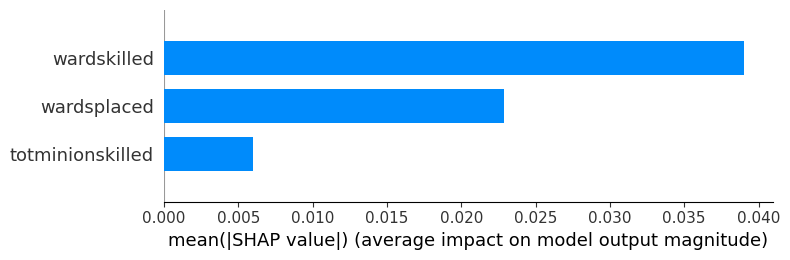

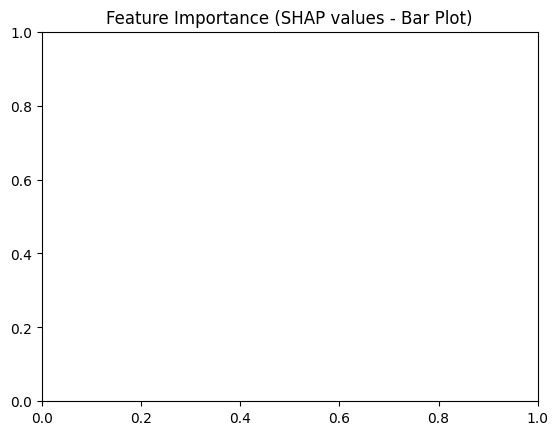

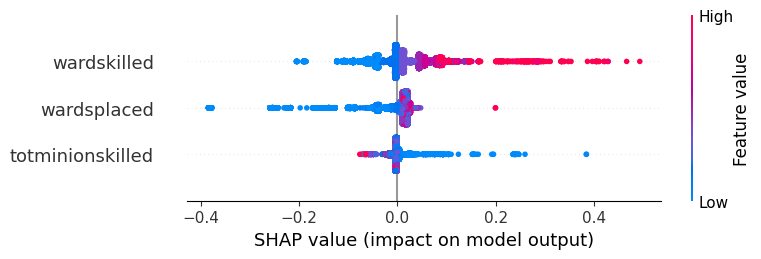

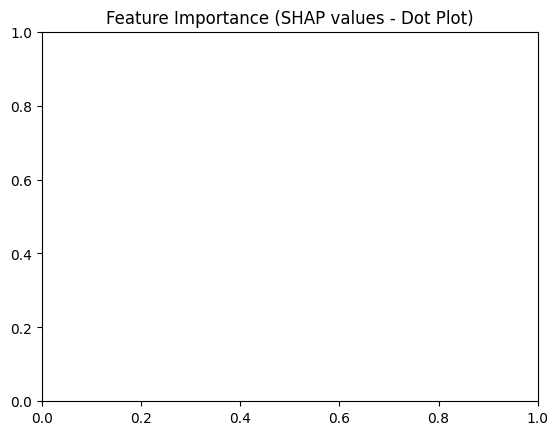

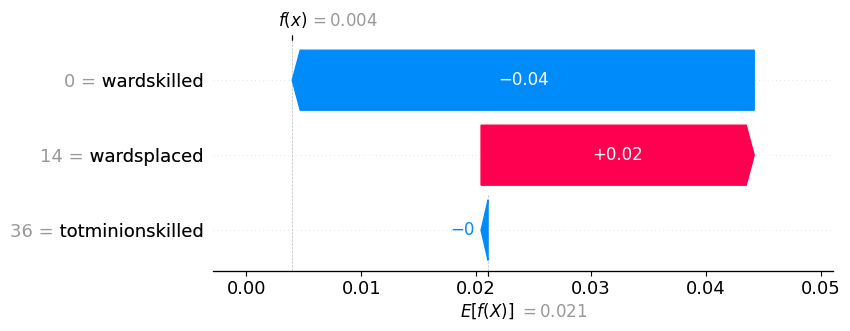

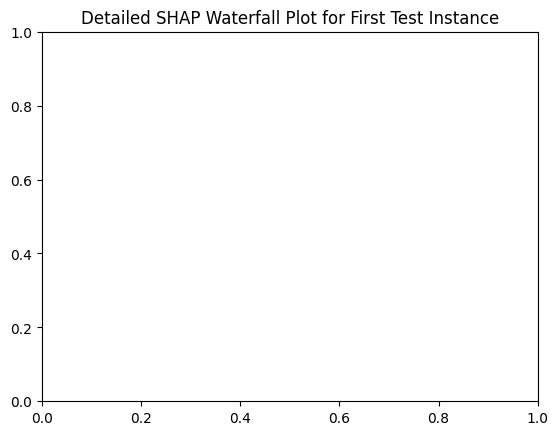

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'totminionskilled',
    'wardsplaced',
    'wardskilled'
]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'totminionskilled': -1,
    'wardsplaced': 1,
    'wardskilled': 1
}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()

First few rows of the dataset:
    id  win  kills  deaths  assists  totdmgtochamp  dmgtoobj  goldearned  \
0    9    0      6      10        1           9101      1826       10497   
5   14    1      3       3        9          10587     16739       11885   
12  21    0      1       7        4           5909      3070        9083   
14  23    0     19       3        8          30236       160       15808   
19  28    1      5       6        6          12571      9574       10990   

    turretkills  inhibkills  totminionskilled  wardsplaced  wardskilled  
0             0           0                42           10            0  
5             1           0                28            8            2  
12            0           0               114            7            1  
14            0           0               120           12            1  
19            0           1                43           10            1  

Missing values in each column:
id                  0
win           

C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\peter\OneDrive\desktop\projects\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\peter\OneDrive\deskt


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20506
           1       0.51      1.00      0.67     21098

    accuracy                           0.51     41604
   macro avg       0.25      0.50      0.34     41604
weighted avg       0.26      0.51      0.34     41604



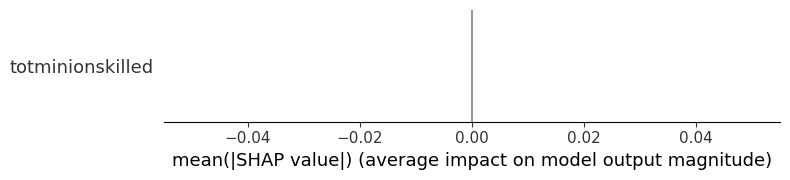

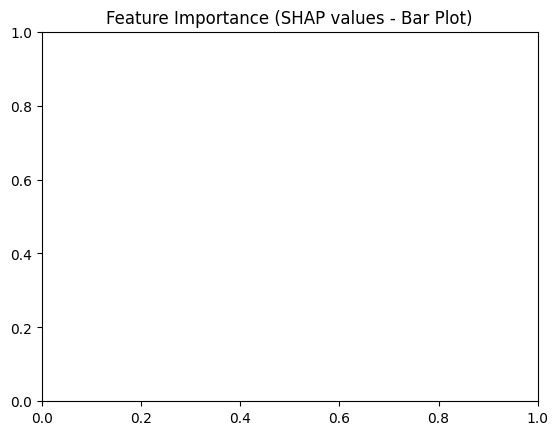

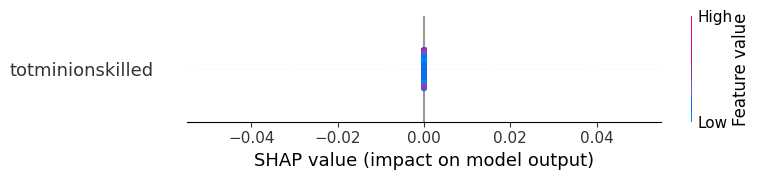

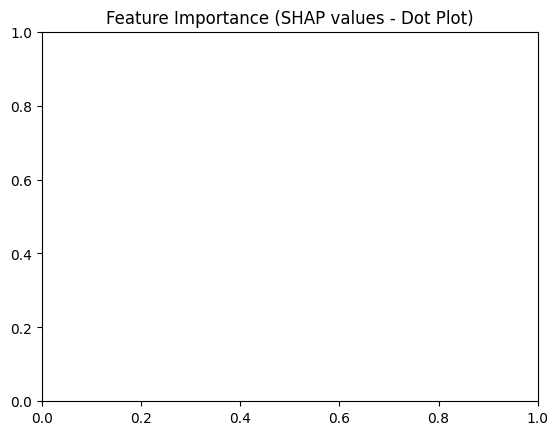

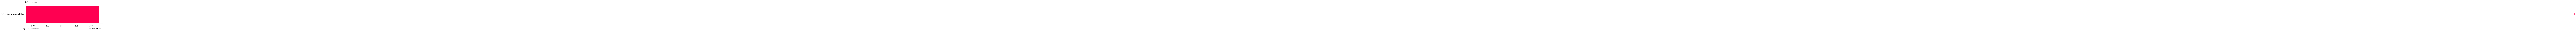

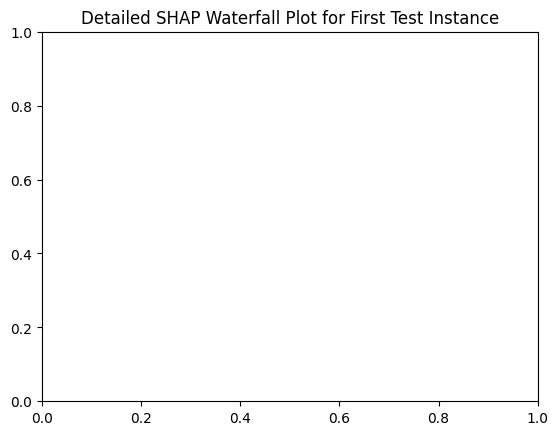

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Display the first few rows to verify
print("First few rows of the dataset:")
print(df.head())

# Define feature columns and target
feature_cols = [
    'totminionskilled',

]

X = df[feature_cols]
y = df['win']

# Handle missing values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
X = X.dropna()
y = y[X.index]

# Option 2: Fill missing values (if dropping is not preferred)
# For numerical features, you might fill with the median or mean
# X = X.fillna(X.median())

# Define monotonic constraints as a dictionary
# 1 for positive, -1 for negative, 0 for no constraint
monotonic_constraints = {
    'totminionskilled': -1,

}

# Verify that all features have a corresponding constraint
assert set(feature_cols) == set(monotonic_constraints.keys()), "Mismatch between feature columns and monotonic constraints."

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures the split maintains the same proportion of classes
)

# Initialize the XGBoost classifier with monotonic constraints
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    monotone_constraints=monotonic_constraints,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

# Predict on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Interpreting Feature Importance with SHAP
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP values - Bar Plot)")
plt.show()

# Summary plot (dot)
shap.summary_plot(shap_values, X_test)
plt.title("Feature Importance (SHAP values - Dot Plot)")
plt.show()

# Detailed feature impact for the first instance in the test set
shap.plots.waterfall(shap_values[0])
plt.title("Detailed SHAP Waterfall Plot for First Test Instance")
plt.show()